**19EID331P**

**Artificial Neural Networks Lab 8 Report**

**Name : M.Murali Krishna**

**Regd.no:322010404039**

**Section:ECE AIML**

**AIM:To train the system to perform  Long Short Term Memory based sentiment analysis on movie reviews dataset**


**Software Used: Google Colab**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
string.punctuation
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb/Train.csv')

In [ ]:
train_df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
train_df.isnull().sum()

text     0
label    0
dtype: int64

Text(0, 0.5, 'Count')

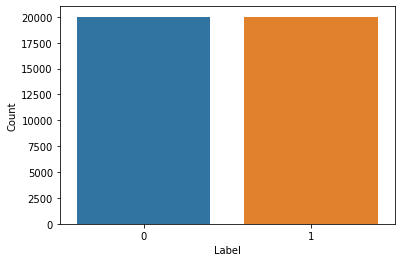

In [ ]:
counts = train_df.label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Label')
plt.ylabel('Count')

In [ ]:
def text_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [ word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    punc_removed_join_clean = str(punc_removed_join_clean).lower()
    return punc_removed_join_clean 

In [ ]:
X_train_df = train_df['text'].apply(text_cleaning)
y_train_df = train_df['label'].values

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb/Test.csv')


In [ ]:
test_df.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [ ]:
test_df.isnull().sum()

text     0
label    0
dtype: int64

Text(0, 0.5, 'Count')

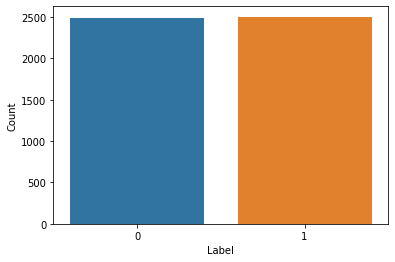

In [ ]:
counts = test_df.label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Label')
plt.ylabel('Count')

In [ ]:
X_test_df = train_df['text'].apply(text_cleaning)
y_test_df = train_df['label'].values

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
vectorizer = CountVectorizer()
data_vectorizer = vectorizer.fit_transform(X_train_df)
X_train, X_test, y_train, y_test = train_test_split(data_vectorizer, y_train_df, test_size=0.2)

**MultinomialNB**

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

NameError: ignored

In [ ]:
y_pred_MNB = MNB.predict(X_test)

NameError: ignored

In [ ]:
Acc_MNB = MNB.score(X_train, y_train)
acc_MNB = MNB.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_MNB*100))
print ('Test Accuracy : {:.2f}%'.format(acc_MNB*100))

Train Accuracy : 92.19%
Test Accuracy : 85.64%


In [ ]:
print(classification_report(y_test,y_pred_MNB))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4049
           1       0.87      0.84      0.85      3951

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000



**Random forest classifier**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
Acc_rfc = rfc.score(X_train, y_train)
acc_rfc = rfc.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_rfc*100))
print ('Test Accuracy : {:.2f}%'.format(acc_rfc*100))

Train Accuracy : 100.00%
Test Accuracy : 85.91%


In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4049
           1       0.86      0.86      0.86      3951

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000



**LINEAR SVC**

In [ ]:
Lsvc =LinearSVC()
Lsvc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
Acc_Lsvc = Lsvc.score(X_train, y_train)
acc_Lsvc = Lsvc.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_Lsvc*100))
print ('Test Accuracy : {:.2f}%'.format(acc_Lsvc*100))

Train Accuracy : 100.00%
Test Accuracy : 86.67%


In [ ]:
y_pred_Lsvc = Lsvc.predict(X_test)
print(classification_report(y_test, y_pred_Lsvc))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4049
           1       0.86      0.87      0.87      3951

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000



**Output**

In [ ]:
output = pd.DataFrame({"Model":['MultinomialNB','Random Forest Classifier','Linear SVC'],
                       "Accuracy":[acc_MNB, acc_rfc, acc_Lsvc]})

NameError: ignored

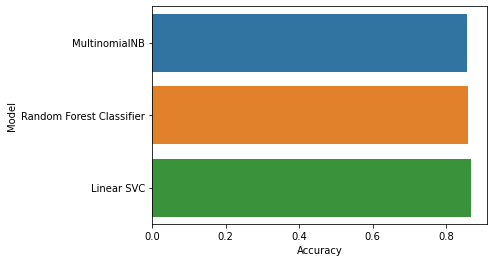

In [ ]:
sns.barplot(x='Accuracy', y='Model', data=output)

**Observation:**

By training our model at first we got a Train Accuracy of 92.19%
Test Accuracy of 85.64%  during MultinomialNB. Later during random forest classifier stage Train Accuracy is improved to 100.00% and 
Test Accuracy is improved to 85.91% .Finally during Linear SVC Train Accuracy remains at  100.00% and Test Accuracy is increased to 86.67%. 

**Result:**
Hence i trained the model to train the system to perform and measure the accuracy in Long Short Term Memory based sentiment analysis on movie reviews dataset